Sillhoute_score 0.17351094019665841
0.17351094019657448


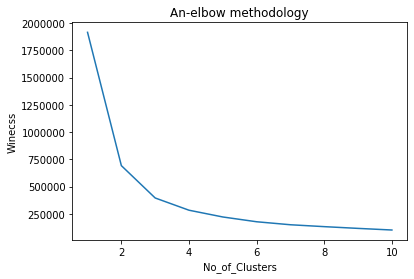

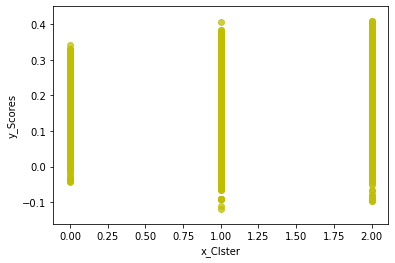

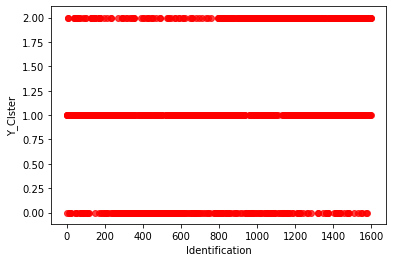

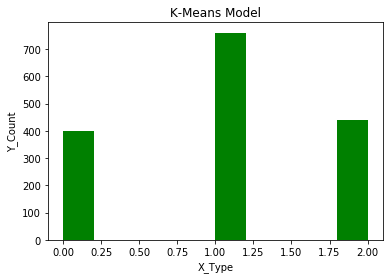

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

givTrainSet = pd.read_csv('LiquorStandard.csv')
D1 = givTrainSet.select_dtypes(exclude=[np.number])
features = list(D1.columns)
labEnc = LabelEncoder()

for p in features:
    givTrainSet[p] = labEnc.fit_transform(givTrainSet[p])
D1 = givTrainSet.select_dtypes(include=[np.number]).interpolate().fillna(givTrainSet.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(D1)
x = scaler.transform(D1)

from sklearn.cluster import KMeans

clustrs = 3
seed = 0
km = KMeans(n_clusters=clustrs, random_state=seed)
km.fit(x)
y_cluster_kmeans = km.predict(x)

from sklearn import metrics

score = metrics.silhouette_score(x, y_cluster_kmeans)
scores = metrics.silhouette_samples(x, y_cluster_kmeans)
print("Sillhoute_score", score)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(D1)
    cluster_an = kmeans.predict(D1)
    wcss.append(kmeans.inertia_)

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array)
feature_scaling_score = metrics.silhouette_score(x_scaled, y_cluster_kmeans)
print(feature_scaling_score)

from sklearn.decomposition import PCA

pCA_Value = PCA(2)
x_pCA_Value = pCA_Value.fit_transform(x_scaled)

km_1 = KMeans(n_clusters=3, random_state=0)
km_1.fit(x_pCA_Value)
k_means_1 = km_1.predict(x_pCA_Value)

yclustrk_means = km_1.predict(x_pCA_Value)


import matplotlib.pyplot as p1lt
p1lt.plot(range(1, 11), wcss)
p1lt.title('An-elbow methodology')
p1lt.xlabel('No_of_Clusters')
p1lt.ylabel('Winecss')
p1lt.show()

p1lt.scatter(yclustrk_means, scores, alpha=.75,
            color='y')
p1lt.xlabel('x_Clster')
p1lt.ylabel('y_Scores')
p1lt.show()

p1lt.scatter(range(1, len(yclustrk_means) + 1), yclustrk_means, alpha=.75,
            color='r')
p1lt.xlabel('Identification')
p1lt.ylabel('Y_Clster')
p1lt.show()

p1lt.hist(yclustrk_means, color="green")
p1lt.xlabel('X_Type')
p1lt.ylabel('Y_Count')
p1lt.title('K-Means Model')
p1lt.show()